# **OPÇÃO 1 - TRABALHO 1**


**ALUNOS:** LEONARDO ALVES DIAS / GABRIELA MENDONÇA / BIA HAAS

**CURSO:** MBA EM BI & DATA SCIENCE

***FONTE DE DADOS***

https://github.com/leodiasx99/Diabetes/blob/main/diabete_trabalho_30_v1.xlsx

*A base que está sendo carregada já tem os dados tratados de acordo com o passo a passo do tratamento dos dados abaixo, pois o dataframe, não salva as alterações/modificações.*

***IMPORTAÇÃO DAS BIBLIOTECAS***

In [2]:
#Para a modelagem de dados
import pandas as pd 

# Utilização de recursos matemáticos
import numpy as np

# Para a plotagem de dados
import matplotlib.pyplot as plt
import seaborn as sns

***CARREGAMENTO DOS DADOS***

In [3]:
dados = pd.read_excel('https://github.com/leodiasx99/Diabetes/blob/main/diabete_trabalho_30_v1.xlsx?raw=true', sheet_name = "Dados")

***VISUALIZAÇÃO DO DADOS***

In [4]:
dados.head(5)

,Id,Numero_gestacoes,Glicose_mg/dl,Pressao_arterial_mmHg,IMC_kg/m²,Idade_anos_01/01/2023,Diabete_0_1
0,2,15,136,70,37.1,43,1
1,3,14,100,78,36.6,46,1
2,4,14,175,62,33.6,38,1
3,5,13,126,90,43.4,42,1
4,6,13,152,90,26.8,43,1


***VERIFICAÇÃO DO TIPO DE DADOS**

In [5]:
# Tratado diretamente no aquivo

dados.dtypes
# os campos (Numero_gestacoes) e (Idade_anos_01/01/2023) estão como OBJ deveriam ser INT64 de acordo com a base.
# Provavelmente existem dados inconsistentes nestas colunas com tipos de dados diferentes.

Id                         int64
Numero_gestacoes           int64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023      int64
Diabete_0_1                int64
dtype: object

**VERIFICAÇÂO DO TIPO DE VARIÁVEIS**

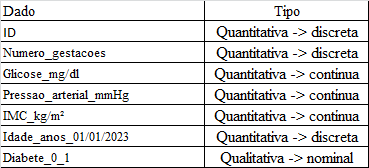

**TRATAMENTO DE DADOS 1 - Removendo dados incosistentes**

In [6]:
# Tratado diretamente no aquivo

# Index 95 da coluna Idade_anos_01/01/2023 estava com data
# Index 261 da coluna Idade_anos_01/01/2023 estava com data
# Index 518 da coluna Numero gestações estava com letra

#dados = dados.drop([95,261,518],axis=0)

**TRATAMENTO DE DADOS 2 - Alterando o tipo de dados**

In [7]:
dados['Numero_gestacoes'] = dados['Numero_gestacoes'].astype('int64')
dados['Idade_anos_01/01/2023'] = dados['Idade_anos_01/01/2023'].astype('int64')
dados.dtypes

Id                         int64
Numero_gestacoes           int64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023      int64
Diabete_0_1                int64
dtype: object

**TRATAMENTO DE DADOS 3 - Removendo linhas que tenha alguma variável sem preeenchimento**

In [8]:
# Tratado diretamente no aquivo

***VERIFICAMOS A CORRELAÇÃO DAS VARIÁVEIS***

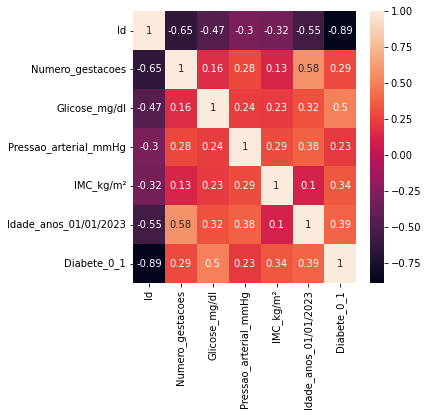

In [9]:
# 0.9 para mais ou para menos indica uma correlação muito forte.
# 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Logo temos as seguintes correlações:
# 1 - Correlação positiva e moderada entre o numero de gestações e a idade
# 2 - Correlação positiva e moderada entre a Diabete_0_1 e a Glicose_mg/dl  

correlacoes = dados.corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlacoes, annot=True);

**ANÁLISE DAS VARIÁVEIS PARA DIABÉTICOS E NÃO DIABÉTICOS**

De acodo com a análise das correlações, foi verificada uma correlação positiva e moderada entre a **Diabete_0_1** e a **Glicose_mg/dl**.

e também o número de destações e a idade

Devem ser consideradas como promissoras para prever diabetes.

**INSIGHT DOS DADOS (GRÁFICOS)**

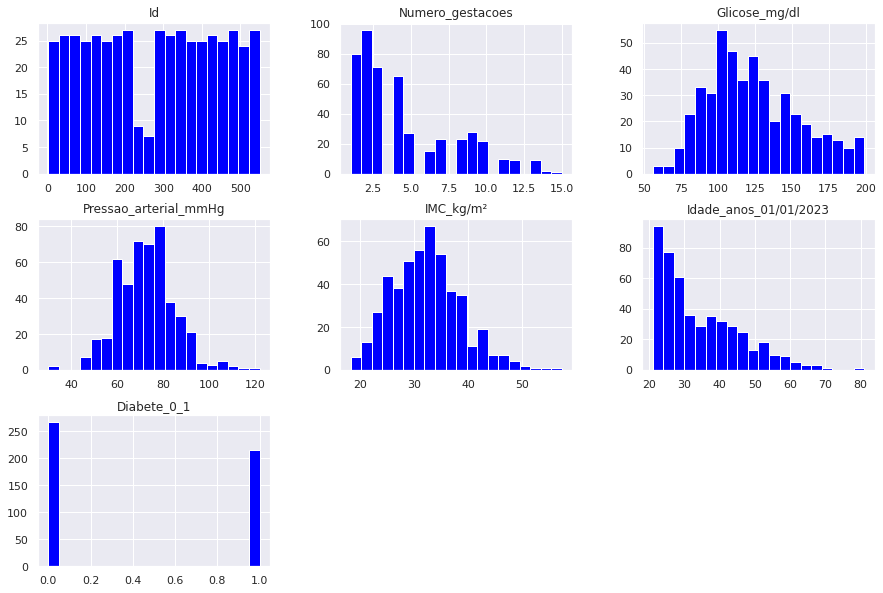

In [10]:
# Vamos analisar a distribuição dos nossos dados
sns.set(font_scale=1.0, rc={'figure.figsize':(15,10)})
eixo = dados.hist(bins=20, color='blue')

**USANDO O BOX PLOT PARA TENTAR VERIFICAR TENDÊNCIAS E/OU OUTLIERS**

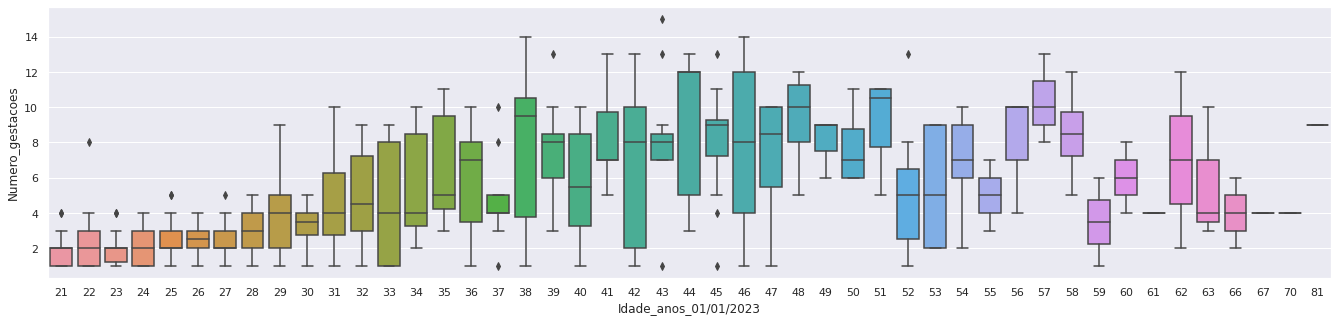

In [11]:
# Usando o boxplot, vamos tentar combinar algumas variáveis para encontrarmos alguns padrões e tendencias
# percebemos que atravez da análise, quanto maior a idade, maior o número de gestações em boa parte dos casos, como vimos na correlação anteriormente.

plt.figure(figsize=(23,5))
sns.boxplot(data=dados, x='Idade_anos_01/01/2023',y='Numero_gestacoes');

# **OPÇÃO 1 - TRABALHO 2**

**CARREGAMENTO DOS MODELOS PARA TESTAR QUAL É O MELHOR**

#####Decision Tree Classifier

#####Random Forest Classifier

#####Gradient Boost Classifier

#####XGBoost Classifier

#####LGBM Classifier

#####Gausian Naive Bayes Classifier

#####C-Support Vector

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

str_randon_state = 42 # para que os resultados sejam os mesmos

In [13]:
#Carrego o train_test_split para separar as variáveis de treino e teste
from sklearn.model_selection import train_test_split

# Queremos prever quem pode ter diabetes, entao removo ela do x e colocamos só ela no y
X = dados.drop('Diabete_0_1', axis = 1)
y = dados['Diabete_0_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=str_randon_state)

**DEFINIMOS ALGUMAS VARIÁVEIS PARA GERAR A MATRIZ DE CONFUSÃO**

In [14]:
from sklearn.metrics import confusion_matrix

#Função Criada para imprimir as matrizes de confusão
def plotaConfusionMatrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Previsto', fontsize=14)
    plt.ylabel('Real', fontsize=14)
    plt.title('Matriz de Confusão', fontsize=14)
    plt.show()

**INSTANCIAMENTO E IMPORTAÇÂO DAS FUNÇÔES PARA MARCAR O TEMPO DE TREINAMENTO DOS MODELOS**

---------- Árvore de decisão - Relatório de Classificação----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        69

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



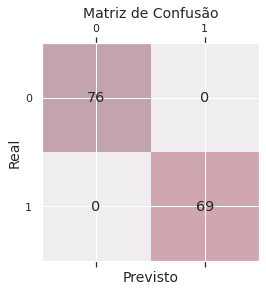

Trempo de treinamento:  0.0043103694915771484


---------- Randon Forest - Relatório de Classificação----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        69

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



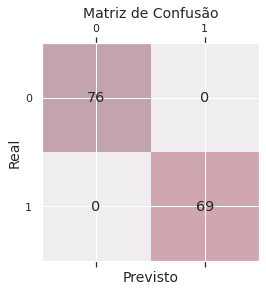

Trempo de treinamento:  0.15556597709655762


---------- Gradient Boosting - Relatório de Classificação ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        69

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



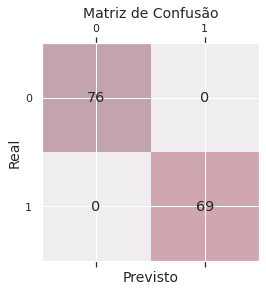

Trempo de treinamento:  0.07015419006347656


---------- XGBRegressor - Relatório de Classificação ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        69

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



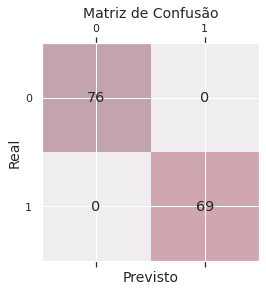

Trempo de treinamento:  0.10411357879638672


---------- LGBMRegressor - Relatório de Classificação ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        69

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



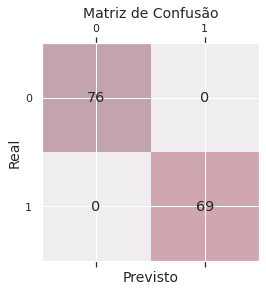

Trempo de treinamento:  0.0555877685546875


---------- Navie Bayes - Relatório de Classificação ----------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.95      1.00      0.97        69

    accuracy                           0.97       145
   macro avg       0.97      0.97      0.97       145
weighted avg       0.97      0.97      0.97       145



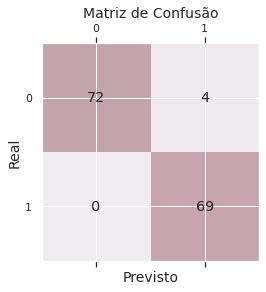

Trempo de treinamento:  0.0034372806549072266




In [15]:
#Instancio os modelos
modelo_DT = DecisionTreeClassifier()
modelo_RF = RandomForestClassifier(max_depth=10, max_leaf_nodes=20, random_state=str_randon_state) 
modelo_GR = GradientBoostingClassifier(max_depth=10, max_leaf_nodes=20, random_state=str_randon_state) 
modelo_XG = XGBClassifier(max_depth=10, max_leaf_nodes=20, random_state=str_randon_state) 
modelo_LG = LGBMClassifier(max_depth=10, max_leaf_nodes=20, random_state=str_randon_state) 
modelo_SVM = SVC(kernel='linear')
modelo_NB = GaussianNB()
modelo_RNA = MLPClassifier(random_state=str_randon_state)

#---------------------------------------------------------------------------

#Importo as funcoes de tempo para podermos marcar o tempo de treinamento
import time

print('-'*10+' Árvore de decisão - Relatório de Classificação'+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_DT.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_DT.predict(X_train) # Predição para o treino 
y_pred_test = modelo_DT.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio 
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

#---------------------------------------------------------------------------

print('-'*10+' Randon Forest - Relatório de Classificação'+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_RF.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_RF.predict(X_train) # Predição para o treino 
y_pred_test = modelo_RF.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio

print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

#---------------------------------------------------------------------------

print('-'*10+' Gradient Boosting - Relatório de Classificação '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_GR.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_GR.predict(X_train) # Predição para o treino 
y_pred_test = modelo_GR.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio 
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

#---------------------------------------------------------------------------
print('-'*10+' XGBRegressor - Relatório de Classificação '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_XG.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_XG.predict(X_train) # Predição para o treino 
y_pred_test = modelo_XG.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio 
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

#---------------------------------------------------------------------------

print('-'*10+' LGBMRegressor - Relatório de Classificação '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_LG.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_LG.predict(X_train) # Predição para o treino 
y_pred_test = modelo_LG.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio 
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

#---------------------------------------------------------------------------

print('-'*10+' Navie Bayes - Relatório de Classificação '+'-'*10)

treino_inicio =  time.time() #Inicio do treinamento
modelo_NB.fit(X_train, y_train) #Treinamento
treino_fim = time.time() #Fim do treinamento
y_pred_train = modelo_NB.predict(X_train) # Predição para o treino 
y_pred_test = modelo_NB.predict(X_test) # Predição para o teste

report = classification_report(y_test, y_pred_test) #Relatorio 
print(report)

conf_matrix = confusion_matrix(y_test, y_pred_test)
plotaConfusionMatrix(conf_matrix)

print('Trempo de treinamento: ', str(treino_fim-treino_inicio))
print('\n')

**ANÁLISE DOS RESULTADOS OBTIDOS ATRÁVEZ DOS TESTES**

De acordo com a análise com os modelos testados

Todos os modelos testados tiveram a mesma **acuracidade** de 100% exceto o *Navie Bayes*.
que teve uma acuracidade de 97%


Foi escolhido **DECISION THREE CLASSIFIER** pois obteve a melhor tempo de execução  **tempo de treinamento foi de (0.0043)**